In [137]:
import os
%load_ext autoreload
%autoreload 2
import pandas as pd
from src.load_data import get_data
dataset= "loadCurveThreeFull"
load_data = get_data(dataset)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [138]:
import os
path = f"../eda/{dataset}"
# Erstelle den Ordner, falls er nicht existiert
if not os.path.exists(path):
    os.makedirs(path)



In [139]:
def aggregate_daily_data(df):
    """
    Aggregiert die Daten auf Tagesbasis unter Verwendung der Spalten für Jahr, Monat und Tag
    und fügt die aggregierten Werte zum ursprünglichen DataFrame hinzu.
    """
    # Stelle sicher, dass alle notwendigen Spalten vorhanden sind
    if not all(col in df.columns for col in ['startDate_year', 'startDate_month', 'startDate_day', 'electricLoad']):
        raise ValueError("Einer der erforderlichen Spalten fehlt im DataFrame.")

    # Konstruiere das Datum direkt ohne Umbenennung
    df['temp_date'] = pd.to_datetime({
        'year': df['startDate_year'], 
        'month': df['startDate_month'], 
        'day': df['startDate_day']
    })
    
    # Aggregiere die Lastdaten auf Tagesbasis
    daily_load = df.groupby('temp_date')['electricLoad'].mean().reset_index(name='mean_electricLoad')
    
    # Füge die aggregierten Werte zum ursprünglichen DataFrame hinzu
    df = pd.merge(df, daily_load, on='temp_date', how='left')
    
    return df


In [140]:
load_data_with_mean_electricLoad =aggregate_daily_data(load_data)
load_data_with_mean_electricLoad

,electricLoad,t1,r1,dayofweek,startDate_year,startDate_month,startDate_day,startDate_hour,startDate_minute,holiday,schoolHoliday,temp_date,mean_electricLoad
0,92.89,8.83,0.0,6,2012,1,1,0,0,1,1,2012-01-01,79.835625
1,87.46,8.83,0.0,6,2012,1,1,0,15,1,1,2012-01-01,79.835625
2,85.52,8.83,0.0,6,2012,1,1,0,30,1,1,2012-01-01,79.835625
3,83.72,8.83,0.0,6,2012,1,1,0,45,1,1,2012-01-01,79.835625
4,81.08,8.89,0.0,6,2012,1,1,1,0,1,1,2012-01-01,79.835625
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116731,84.08,9.60,0.0,3,2015,4,30,22,45,0,0,2015-04-30,93.400000
116732,80.32,9.58,0.0,3,2015,4,30,23,0,0,0,2015-04-30,93.400000
116733,76.26,9.57,0.0,3,2015,4,30,23,15,0,0,2015-04-30,93.400000
116734,72.79,9.55,0.0,3,2015,4,30,23,30,0,0,2015-04-30,93.400000


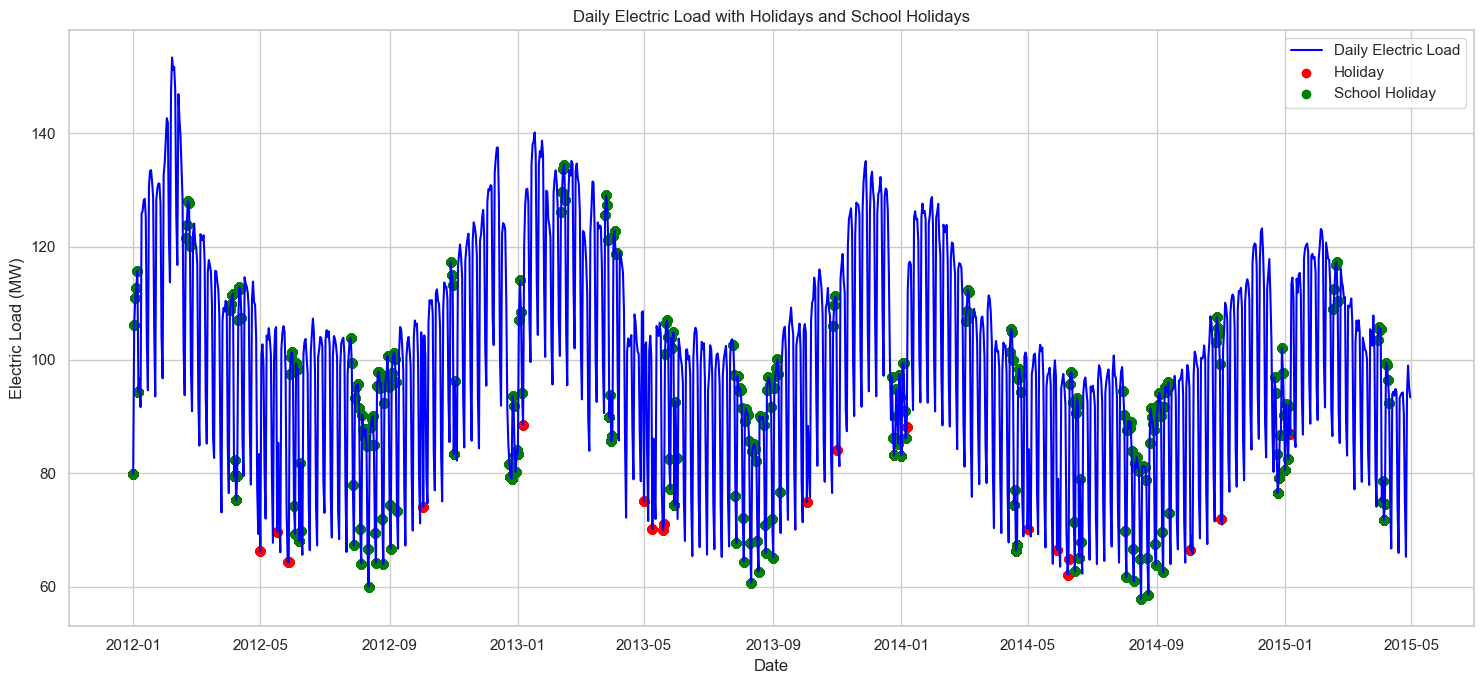

In [141]:
import matplotlib.pyplot as plt
import pandas as pd

# Angenommen, `merged_df` ist dein finaler DataFrame mit aggregierten täglichen Lasten und Feiertagsinformationen
# merged_df sollte 'temp_date', 'mean_electricLoad', 'holiday', und 'schoolHoliday' Spalten enthalten

plt.figure(figsize=(15, 7))
plt.plot(load_data_with_mean_electricLoad['temp_date'], load_data_with_mean_electricLoad['mean_electricLoad'], label='Daily Electric Load', color='blue')

# Markiere Feiertage
plt.scatter(load_data_with_mean_electricLoad[load_data_with_mean_electricLoad['holiday'] == 1]['temp_date'], 
            load_data_with_mean_electricLoad[load_data_with_mean_electricLoad['holiday'] == 1]['mean_electricLoad'], 
            color='red', label='Holiday')

# Markiere Schulferien
plt.scatter(load_data_with_mean_electricLoad[load_data_with_mean_electricLoad['schoolHoliday'] == 1]['temp_date'], 
            load_data_with_mean_electricLoad[load_data_with_mean_electricLoad['schoolHoliday'] == 1]['mean_electricLoad'], 
            color='green', label='School Holiday')

plt.xlabel('Date')
plt.ylabel('Electric Load (MW)')
plt.title('Daily Electric Load with Holidays and School Holidays')
plt.legend()
plt.tight_layout()
plt.savefig(path + "/lectricLoad_holiday.jpg")

plt.show()


In [142]:
# Berechne tägliche Maxima und Minima
daily_max = load_data_with_mean_electricLoad.groupby('temp_date')['electricLoad'].max().reset_index(name='daily_max')
daily_min = load_data_with_mean_electricLoad.groupby('temp_date')['electricLoad'].min().reset_index(name='daily_min')
daily_mean = load_data_with_mean_electricLoad.groupby('temp_date')['electricLoad'].mean().reset_index(name='daily_mean')
# Füge Feiertagsinformationen hinzu (angenommen, diese existieren bereits im DataFrame)
daily_stats = pd.merge(daily_max, daily_min, on='temp_date')
daily_stats = pd.merge(daily_stats, daily_mean, on='temp_date')
daily_stats = pd.merge(daily_stats, load_data_with_mean_electricLoad[['temp_date', 'holiday']].drop_duplicates(), on='temp_date', how='left')


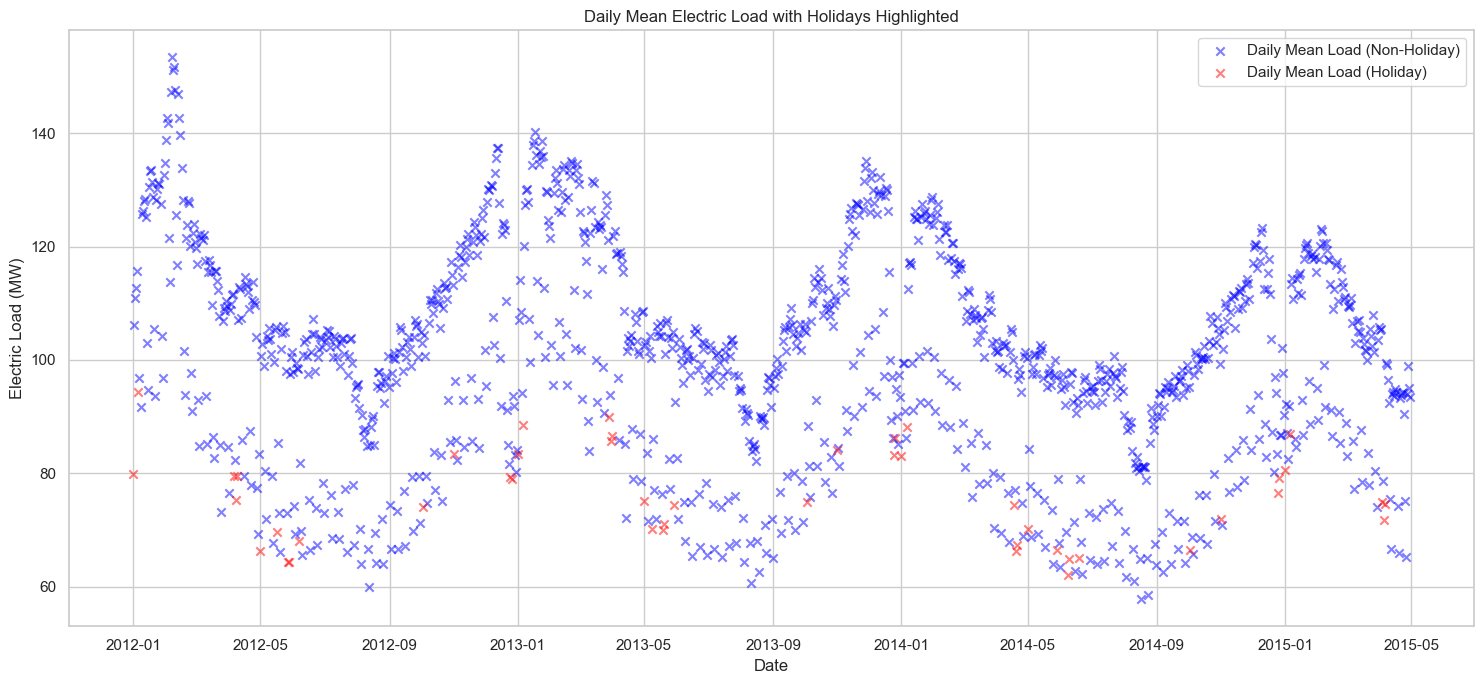

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze den Stil
sns.set(style="whitegrid")

plt.figure(figsize=(15, 7))

# Erstelle separate DataFrames für Feiertage und Nicht-Feiertage
holiday_data = daily_stats[daily_stats['holiday'] == 1]
non_holiday_data = daily_stats[daily_stats['holiday'] == 0]

# Plotte tägliche Maxima und Minima für Nicht-Feiertage
# plt.scatter(non_holiday_data['temp_date'], non_holiday_data['daily_max'], color='blue', marker='^', label='Daily Max Load (Non-Holiday)', alpha=0.5)
# plt.scatter(non_holiday_data['temp_date'], non_holiday_data['daily_min'], color='blue', marker='v', label='Daily Min Load (Non-Holiday)', alpha=0.5)
plt.scatter(non_holiday_data['temp_date'], non_holiday_data['daily_mean'], color='blue', marker='x', label='Daily Mean Load (Non-Holiday)', alpha=0.5)
# Plotte tägliche Maxima und Minima für Feiertage
# plt.scatter(holiday_data['temp_date'], holiday_data['daily_max'], color='red', marker='^', label='Daily Max Load (Holiday)', alpha=0.5)
plt.scatter(holiday_data['temp_date'], holiday_data['daily_mean'], color='red', marker='x', label='Daily Mean Load (Holiday)', alpha=0.5)

plt.title('Daily Mean Electric Load with Holidays Highlighted')
plt.xlabel('Date')
plt.ylabel('Electric Load (MW)')
plt.legend()

# Anpassung für bessere Darstellung
plt.tight_layout()
plt.savefig(path + "/lectricLoad_holiday_2.jpg")

# Zeige den Plot
plt.show()

In [144]:
df= load_data_with_mean_electricLoad
print("Mittelwert:", df['electricLoad'].mean())
print("Median:", df['electricLoad'].median())
print("Standardabweichung:", df['electricLoad'].std())
print("Varianz:", df['electricLoad'].var())
print("Minimum:", df['electricLoad'].min())
print("Maximum:", df['electricLoad'].max())


Mittelwert: 99.70390659265351
Median: 99.64
Standardabweichung: 27.670701100185905
Varianz: 765.6676993758296
Minimum: 40.48
Maximum: 174.27


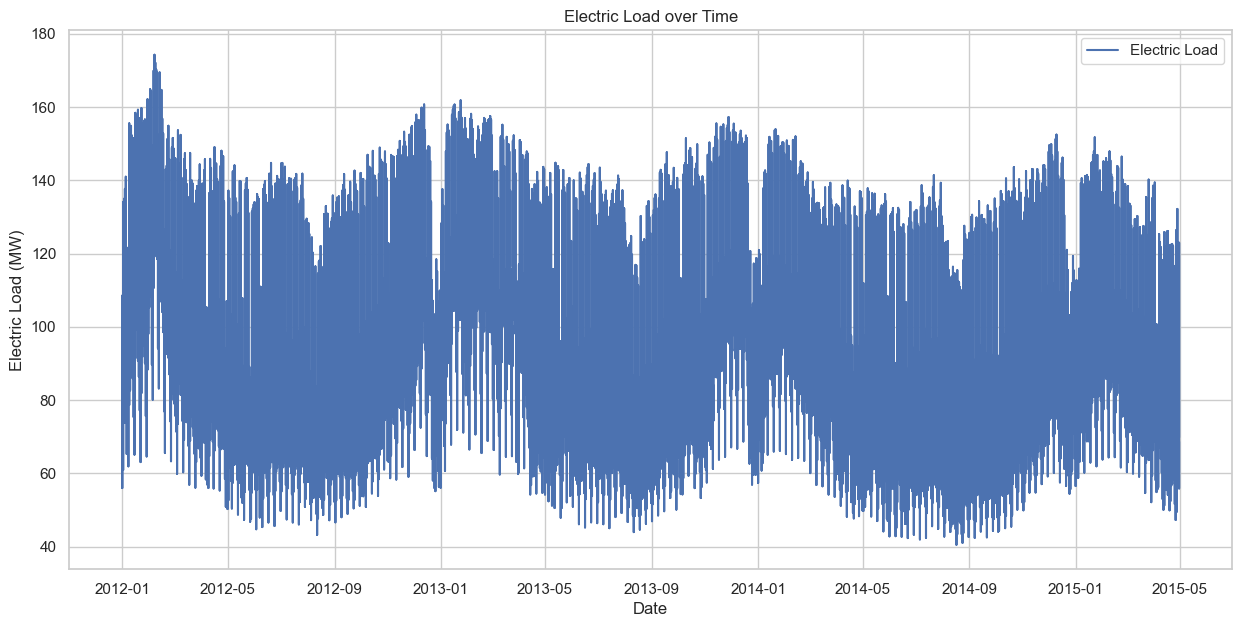

In [145]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(df['temp_date'], df['electricLoad'], label='Electric Load')
plt.xlabel('Date')
plt.ylabel('Electric Load (MW)')
plt.title('Electric Load over Time')
plt.legend()
plt.savefig(path + "/lectricLoad.jpg")

plt.show()


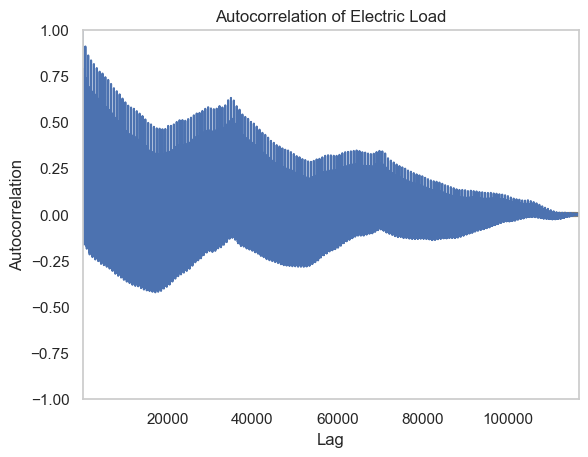

In [146]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['electricLoad'])
plt.title('Autocorrelation of Electric Load')
plt.savefig(path + "/lectricLoad_autocorrelation.jpg")

plt.show()


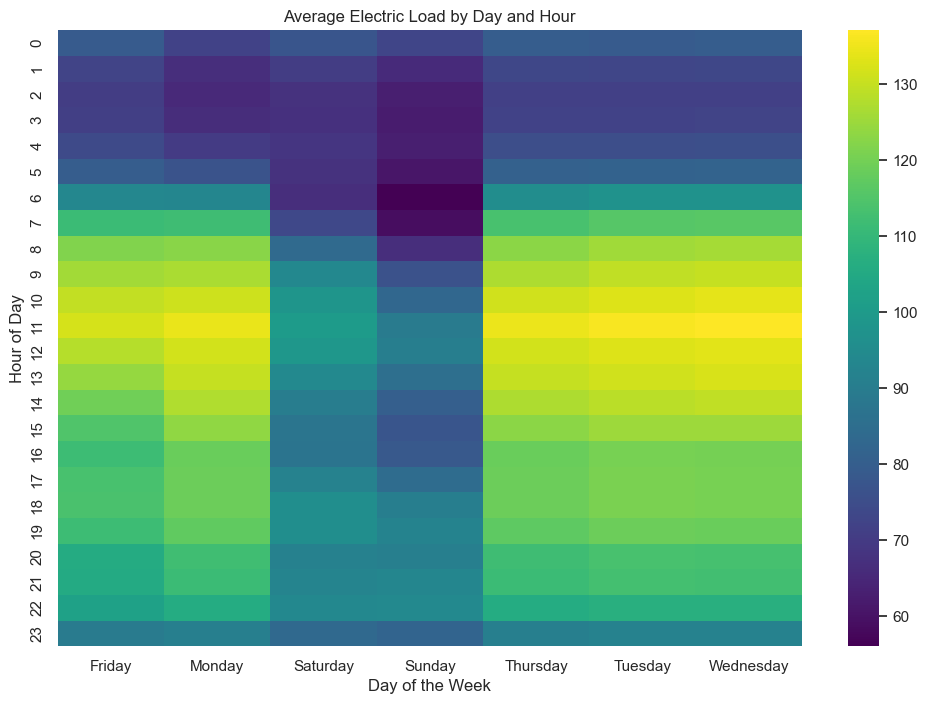

In [147]:
import seaborn as sns

# Erstelle eine Pivot-Tabelle
pivot_table = df.pivot_table(values='electricLoad', index=df['startDate_hour'], columns=df['temp_date'].dt.day_name(), aggfunc='mean')

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis')
plt.title('Average Electric Load by Day and Hour')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of Day')
plt.savefig(path + "/AverageElectricLoadDayHour.jpg")

plt.show()


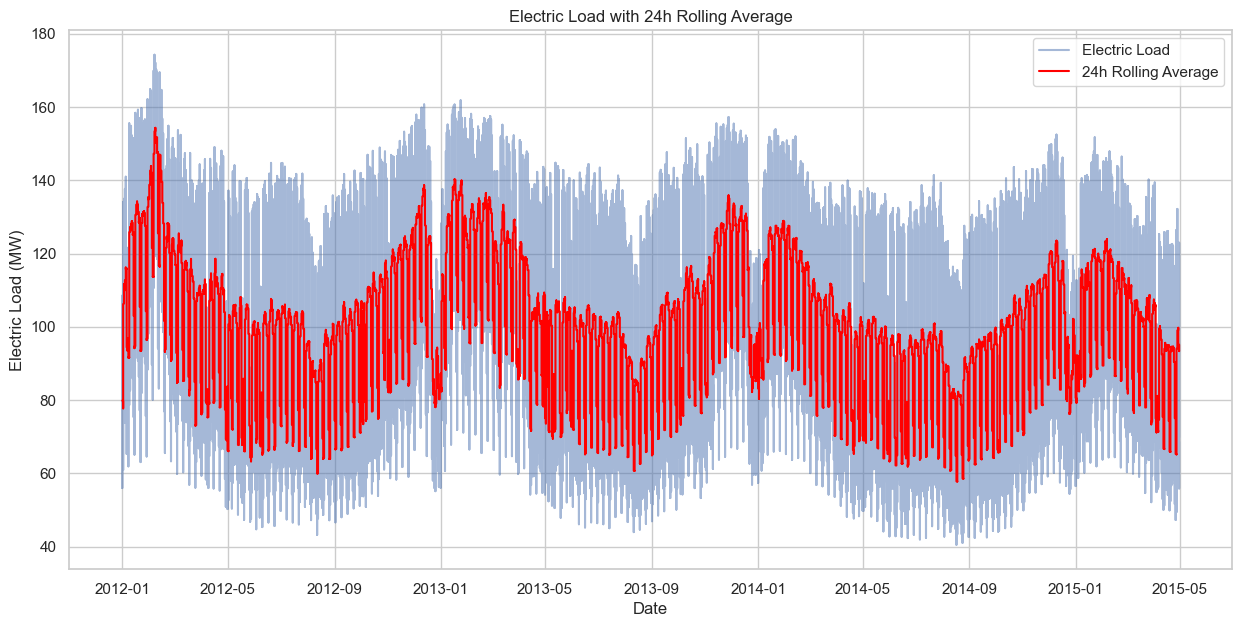

In [148]:
df['rolling_avg'] = df['electricLoad'].rolling(window=24*4).mean()  

plt.figure(figsize=(15, 7))
plt.plot(df['temp_date'], df['electricLoad'], label='Electric Load', alpha=0.5)
plt.plot(df['temp_date'], df['rolling_avg'], label='24h Rolling Average', color='red')
plt.xlabel('Date')
plt.ylabel('Electric Load (MW)')
plt.title('Electric Load with 24h Rolling Average')
plt.legend()
plt.savefig(path + "/ElectricLoadRollingAverage.jpg")

plt.show()


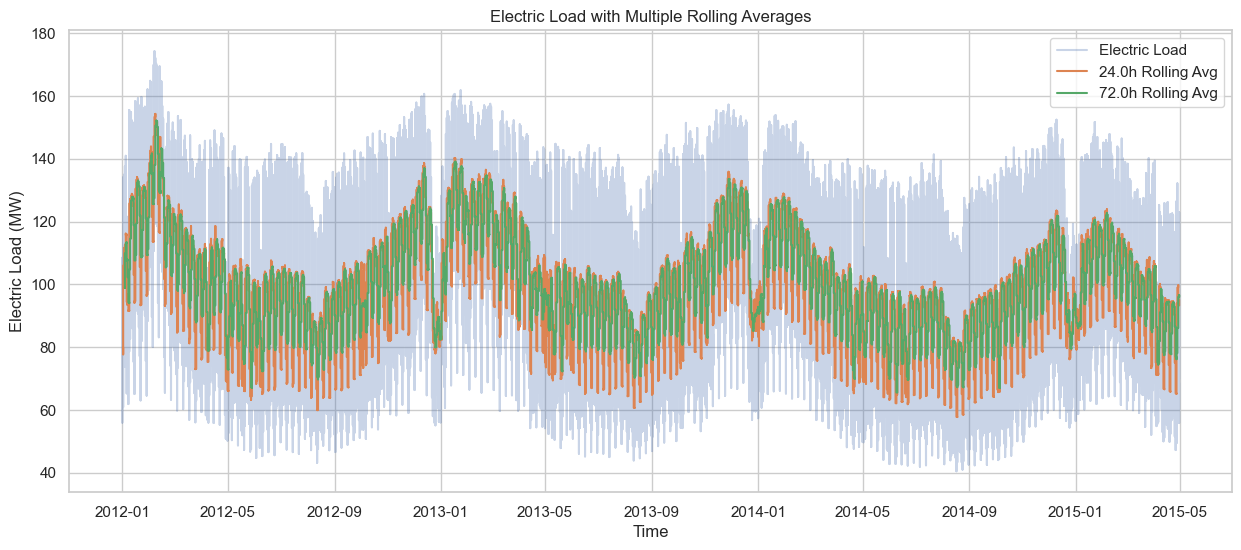

In [149]:
from src.preprocessing import add_rolling_average_electric_load

lags = [24*4, 24*4*3]  #1 Tag, 3 Tage


import matplotlib.pyplot as plt


plt.figure(figsize=(15, 6))

plt.plot(load_data_with_mean_electricLoad['temp_date'], load_data_with_mean_electricLoad['electricLoad'], label='Electric Load', alpha=0.3)
# Berechne und plotte gleitende Durchschnitte für verschiedene Lags
for lag in lags:
    # Berechne den gleitenden Durchschnitt für den aktuellen Lag
    rolling_average = add_rolling_average_electric_load(load_data_with_mean_electricLoad, 'electricLoad', lag)
    
    # Plotte den gleitenden Durchschnitt
    plt.plot(rolling_average['temp_date'], rolling_average[f'electricLoad_rolling_avg_{lag}'], label=f'{lag/4}h Rolling Avg')

plt.title('Electric Load with Multiple Rolling Averages')
plt.xlabel('Time')
plt.ylabel('Electric Load (MW)')
plt.legend()
plt.savefig(path + "/ElectricLoadRollingAverage2.jpg")

plt.show()



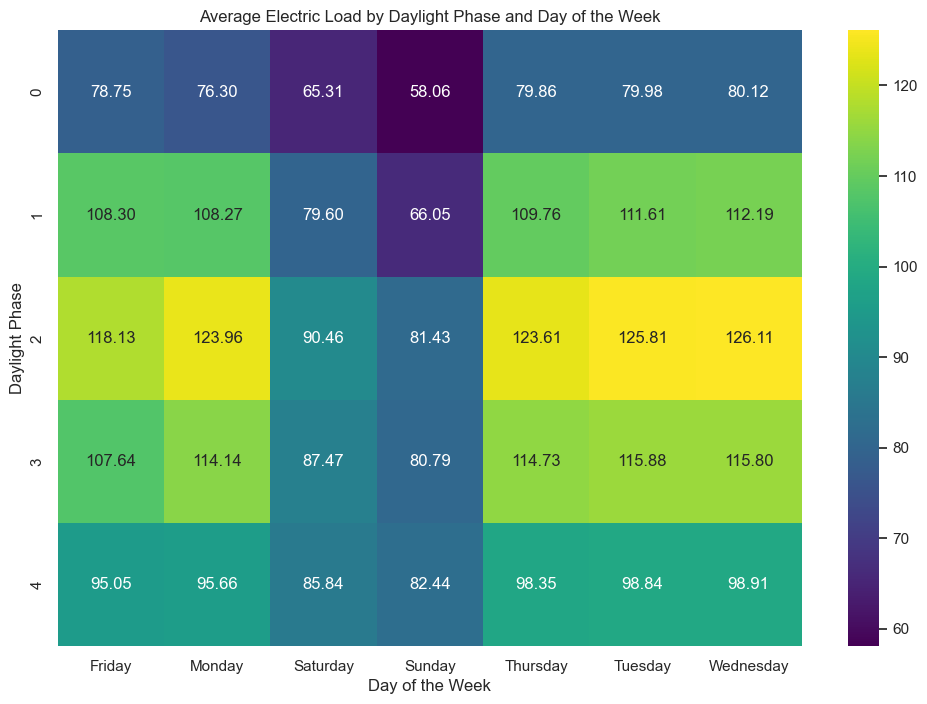

In [150]:
from src.preprocessing import get_daylight_phase

load_data['daylight_phase'] = load_data.apply(get_daylight_phase, axis=1)
# Erstelle eine Pivot-Tabelle für die Heatmap
pivot_table = load_data.pivot_table(values='electricLoad', index='daylight_phase', columns=df['temp_date'].dt.day_name(), aggfunc='mean')

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt=".2f")
plt.title('Average Electric Load by Daylight Phase and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Daylight Phase')
plt.savefig(path + "/ElectricLoadDaylight.jpg")

plt.show()


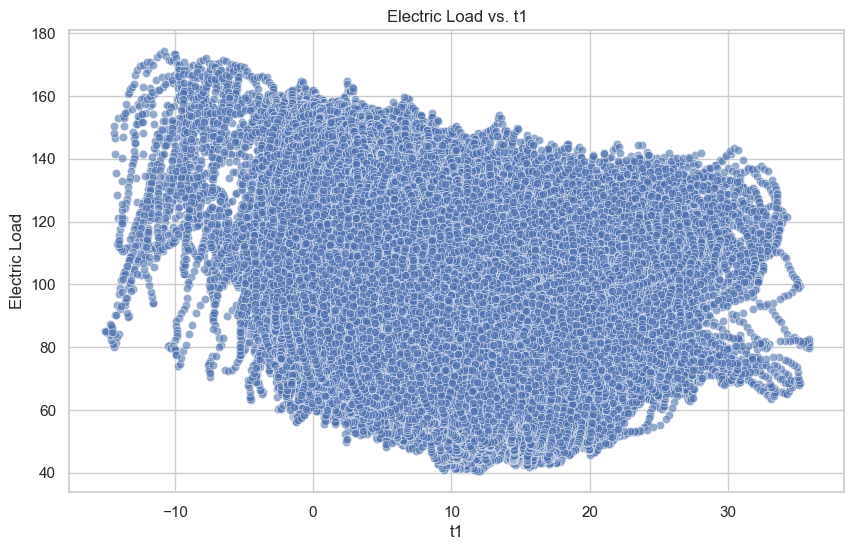

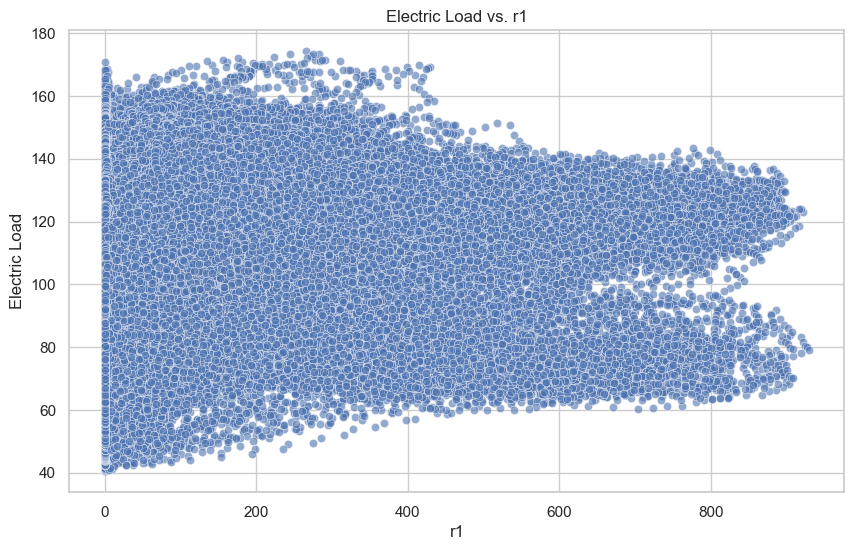

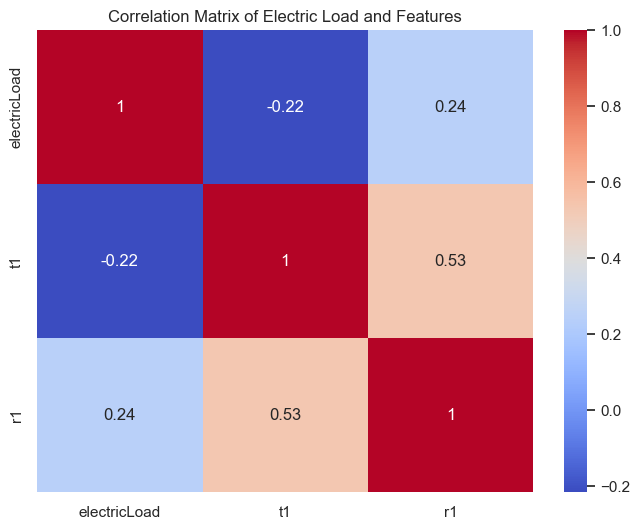

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Angenommen, df ist Ihr DataFrame
# df = pd.read_csv('your_data.csv')  # Beispiel, wie Sie Ihren DataFrame laden könnten

# Überprüfen, welche der gewünschten Spalten vorhanden sind
available_columns = df.columns
features_to_plot = ['t1', 't2', 'r1', 'r2']
features_exist = [feature for feature in features_to_plot if feature in available_columns]

# Erstellen von Plots für jede vorhandene Feature-Spalte
for feature in features_exist:
    # Scatterplot für Feature gegen electricLoad
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=feature, y='electricLoad', alpha=0.6)
    plt.title(f'Electric Load vs. {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Electric Load')
    plt.show()

    # Optional: Erstellen einer Heatmap zur Untersuchung der Korrelation, wenn mehrere Features vorhanden sind
    # Dies ist sinnvoll, wenn Sie mehrere Features gleichzeitig betrachten möchten
if len(features_exist) > 1:
    # Auswahl der relevanten Spalten für die Korrelationsmatrix
    cols_for_corr = ['electricLoad'] + features_exist
    corr_matrix = df[cols_for_corr].corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.savefig(path + "/CorrelationElectricLoadFeatures.jpg")
    plt.title('Correlation Matrix of Electric Load and Features')
    plt.show()


In [163]:
values_lc1 =[
      1,
      0,
      1,
      1,
      1,
      0,
      4,
      8,
      8,
      9,
      25,
      23,
      27,
      19,
      33,
      58,
      62,
      75,
      67,
      92,
      139,
      234,
      299,
      543,
      586,
      865,
      1100,
      1461,
      1717,
      1786,
      1799,
      1739,
      1718,
      1525,
      1308,
      1112,
      996,
      777,
      654,
      526,
      410,
      271,
      244,
      202,
      145,
      133,
      121,
      94,
      75,
      69,
      43,
      25,
      24,
      22,
      16,
      17,
      12,
      10,
      8,
      3,
      3,
      1,
      1,
      1
    ]

bins_lc1=[
      -99.87817016601562,
      -96.54701246261597,
      -93.2158547592163,
      -89.88469705581664,
      -86.55353935241699,
      -83.22238164901734,
      -79.89122394561767,
      -76.56006624221801,
      -73.22890853881836,
      -69.89775083541869,
      -66.56659313201904,
      -63.23543542861938,
      -59.90427772521972,
      -56.57312002182007,
      -53.241962318420406,
      -49.91080461502075,
      -46.57964691162109,
      -43.24848920822143,
      -39.917331504821775,
      -36.58617380142211,
      -33.25501609802245,
      -29.923858394622798,
      -26.592700691223143,
      -23.26154298782349,
      -19.93038528442382,
      -16.599227581024167,
      -13.268069877624512,
      -9.936912174224844,
      -6.60575447082519,
      -3.2745967674255354,
      0.05656093597411882,
      3.3877186393737873,
      6.7188763427734415,
      10.050034046173096,
      13.381191749572764,
      16.71234945297242,
      20.043507156372073,
      23.374664859771727,
      26.705822563171395,
      30.03698026657105,
      33.36813796997072,
      36.69929567337036,
      40.030453376770026,
      43.361611080169695,
      46.692768783569335,
      50.023926486969,
      53.35508419036864,
      56.68624189376831,
      60.01739959716798,
      63.34855730056762,
      66.67971500396729,
      70.01087270736696,
      73.3420304107666,
      76.67318811416627,
      80.00434581756593,
      83.33550352096557,
      86.66666122436524,
      89.99781892776491,
      93.32897663116455,
      96.66013433456422,
      99.99129203796386,
      103.32244974136353,
      106.6536074447632,
      109.98476514816284,
      113.3159228515625
    ]

In [164]:
values_lc2=[
      8,
      5,
      11,
      20,
      19,
      34,
      44,
      52,
      64,
      93,
      102,
      124,
      189,
      189,
      282,
      283,
      361,
      379,
      485,
      513,
      604,
      742,
      877,
      971,
      1048,
      1152,
      1156,
      1215,
      1205,
      1241,
      1213,
      1207,
      1143,
      1151,
      959,
      869,
      765,
      618,
      516,
      375,
      308,
      199,
      130,
      99,
      76,
      62,
      36,
      25,
      24,
      22,
      24,
      11,
      9,
      7,
      4,
      4,
      5,
      4,
      1,
      0,
      4,
      3,
      3,
      1
    ]

bins_lc2= [
      -12.190926971435545,
      -11.820001733303068,
      -11.44907649517059,
      -11.078151257038114,
      -10.707226018905637,
      -10.336300780773161,
      -9.965375542640684,
      -9.594450304508207,
      -9.22352506637573,
      -8.852599828243253,
      -8.481674590110776,
      -8.1107493519783,
      -7.739824113845823,
      -7.368898875713346,
      -6.99797363758087,
      -6.627048399448393,
      -6.256123161315916,
      -5.885197923183439,
      -5.514272685050962,
      -5.143347446918486,
      -4.772422208786009,
      -4.401496970653532,
      -4.0305717325210555,
      -3.6596464943885785,
      -3.2887212562561015,
      -2.9177960181236244,
      -2.5468707799911474,
      -2.1759455418586704,
      -1.8050203037261952,
      -1.4340950655937181,
      -1.0631698274612411,
      -0.6922445893287641,
      -0.3213193511962871,
      0.04960588693618995,
      0.42053112506866697,
      0.791456363201144,
      1.162381601333621,
      1.5333068394660962,
      1.9042320775985733,
      2.2751573157310503,
      2.6460825538635273,
      3.0170077919960043,
      3.3879330301284813,
      3.7588582682609584,
      4.129783506393434,
      4.500708744525912,
      4.871633982658388,
      5.2425592207908664,
      5.613484458923342,
      5.984409697055817,
      6.355334935188296,
      6.726260173320771,
      7.09718541145325,
      7.468110649585725,
      7.839035887718204,
      8.209961125850679,
      8.580886363983154,
      8.951811602115633,
      9.322736840248108,
      9.693662078380587,
      10.064587316513062,
      10.435512554645541,
      10.806437792778016,
      11.177363030910495,
      11.54828826904297
    ]

In [165]:
values_lc3 =  [
      1,
      0,
      0,
      1,
      1,
      1,
      1,
      1,
      2,
      1,
      1,
      2,
      4,
      5,
      3,
      2,
      8,
      9,
      17,
      18,
      16,
      21,
      21,
      31,
      28,
      27,
      52,
      70,
      132,
      167,
      320,
      469,
      642,
      983,
      1267,
      1644,
      1979,
      2237,
      2495,
      2325,
      2180,
      1769,
      1349,
      1041,
      721,
      468,
      329,
      167,
      113,
      70,
      34,
      22,
      15,
      9,
      10,
      4,
      10,
      4,
      10,
      6,
      2,
      3,
      3,
      2
    ]

bins_lc3= [
      -45.99930389404297,
      -44.98165600299835,
      -43.96400811195373,
      -42.94636022090911,
      -41.9287123298645,
      -40.911064438819885,
      -39.89341654777527,
      -38.87576865673065,
      -37.85812076568603,
      -36.84047287464142,
      -35.8228249835968,
      -34.805177092552185,
      -33.78752920150757,
      -32.76988131046295,
      -31.75223341941833,
      -30.734585528373714,
      -29.7169376373291,
      -28.69928974628448,
      -27.681641855239867,
      -26.66399396419525,
      -25.64634607315063,
      -24.628698182106017,
      -23.6110502910614,
      -22.59340240001678,
      -21.575754508972167,
      -20.55810661792755,
      -19.54045872688293,
      -18.522810835838314,
      -17.5051629447937,
      -16.48751505374908,
      -15.469867162704464,
      -14.45221927165985,
      -13.434571380615232,
      -12.416923489570614,
      -11.399275598525996,
      -10.381627707481378,
      -9.363979816436768,
      -8.34633192539215,
      -7.328684034347532,
      -6.311036143302914,
      -5.293388252258296,
      -4.275740361213678,
      -3.2580924701690677,
      -2.24044457912445,
      -1.222796688079832,
      -0.20514879703521416,
      0.8124990940094037,
      1.8301469850540215,
      2.8477948760986322,
      3.86544276714325,
      4.883090658187868,
      5.900738549232486,
      6.918386440277104,
      7.936034331321721,
      8.95368222236634,
      9.97133011341095,
      10.988978004455568,
      12.006625895500186,
      13.024273786544803,
      14.041921677589421,
      15.05956956863404,
      16.07721745967865,
      17.094865350723268,
      18.112513241767886,
      19.130161132812503
    ]

In [166]:
import os
path = f"../erg/lc1"
# Erstelle den Ordner, falls er nicht existiert
if not os.path.exists(path):
    os.makedirs(path)


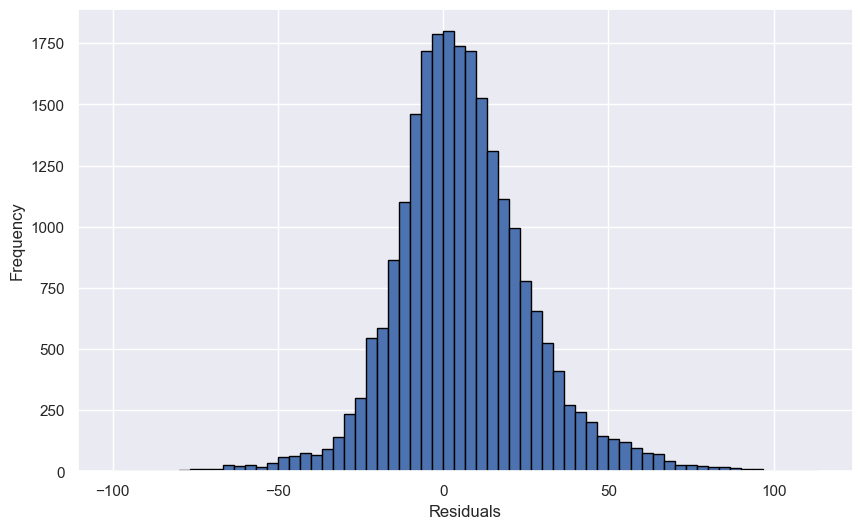

In [167]:
# Importieren von matplotlib.pyplot, da es nach dem Zurücksetzen des Codes noch nicht definiert wurde
import matplotlib.pyplot as plt


# Erstellen des Histogramms mit den reduzierten Daten
plt.figure(figsize=(10, 6))
plt.hist(bins_lc1[:-1], bins=bins_lc1, weights=values_lc1, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.savefig(path + "/residuals.jpg")

plt.show()
